## LeNet-5

### Import the libraries

In [1]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

2023-01-29 09:29:33.610757: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-29 09:29:33.771678: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-29 09:29:33.771712: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-29 09:29:34.643863: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

11490434/11490434 [==============================] - 18s 2us/step


In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [8]:
X_train = np.pad(X_train, ((0,0), (2,2), (2,2), (0,0)), 'constant')
X_test = np.pad(X_test, ((0,0), (2,2), (2,2), (0,0)), 'constant')

In [9]:
in_shape = X_train.shape[1:]

In [10]:
in_shape

(32, 32, 1)

In [31]:
num_classes = len(np.unique(y_train))

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, AvgPool2D, Flatten

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=in_shape))
model.add(AvgPool2D((2,2)))

In [26]:
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
model.add(AvgPool2D((2,2)))

In [27]:
model.add(Conv2D(filters=120, kernel_size=(5,5), activation='relu'))

In [29]:
model.add(Flatten())

In [30]:
model.add(Dense(84, activation='relu'))

In [32]:
model.add(Dense(num_classes, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_11 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)              

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs=20, batch_size=128, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.3774 - accuracy: 0.9189 - val_loss: 0.0796 - val_accuracy: 0.9731
Epoch 2/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0730 - accuracy: 0.9776 - val_loss: 0.0656 - val_accuracy: 0.9805
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0552 - accuracy: 0.9832 - val_loss: 0.0440 - val_accuracy: 0.9843
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0439 - accuracy: 0.9859 - val_loss: 0.0368 - val_accuracy: 0.9890
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0394 - val_accuracy: 0.9882
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0447 - val_accuracy: 0.9860
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0341 - val_accuracy: 0.9888

### Import test data

In [38]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.image import rgb_to_grayscale
from PIL import ImageOps

In [52]:
img = load_img('digit8.png', target_size=(32, 32))

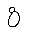

In [53]:
img

In [54]:
img = ImageOps.invert(img)

In [55]:
img = img_to_array(img)

In [56]:
img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [57]:
img.shape

(32, 32, 3)

In [58]:
np.max(img)

255.0

In [59]:
img = rgb_to_grayscale(img)

In [60]:
img = img / 255.0

In [61]:
img = np.expand_dims(img, axis=0)

In [62]:
img.shape

(1, 32, 32, 1)

In [63]:
img.shape

(1, 32, 32, 1)

In [64]:
y_pred = model.predict(img)

1/1 [==============================] - 0s 125ms/step


In [65]:
y_pred

array([[0.09450544, 0.08934963, 0.09955046, 0.09851301, 0.09951252,
        0.09819793, 0.08939937, 0.08237698, 0.1295337 , 0.11906093]],
      dtype=float32)

In [66]:
y_pred.round(3)

array([[0.095, 0.089, 0.1  , 0.099, 0.1  , 0.098, 0.089, 0.082, 0.13 ,
        0.119]], dtype=float32)

In [67]:
predicted = np.argmax(y_pred, -1)

In [68]:
predicted

array([8])

In [69]:
import matplotlib.pyplot as plt

([], [])

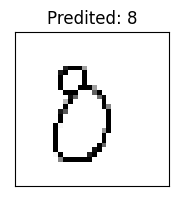

In [72]:
plt.figure(figsize=(2,2))
plt.imshow(img[0], cmap=plt.cm.gray_r)
plt.title('Predited: {}'.format(predicted[0]))
plt.yticks([])
plt.xticks([])

In [73]:
img

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]]], dtype=float32)